## Table of content for blog series

* **`Importing libraries`**
* **`Bar plot`**
    * Basics of barplot
    * Stacked barplot
        * Stacked barplot [`matplotlib style`]
        * Stacked barplot [`pandas and matplotlib style`]

### Loading libraries

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
tips = pd.read_csv("datasets/tips.csv")
tips.head(4)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2


### Data preparation

In [34]:
df = (tips
      .groupby("sex")["smoker"]
      .value_counts(normalize=True)
      .mul(100)
      .round(2)
      .unstack())

df

smoker,No,Yes
sex,,
Female,62.07,37.93
Male,61.78,38.22


### Using Matplotlib [style]

<BarContainer object of 2 artists>

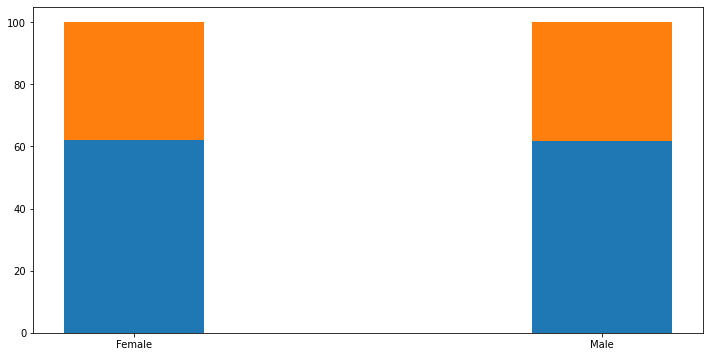

In [35]:
fig, ax = plt.subplots(figsize = (12,6))

ax.bar(df.index, df["No"], label = "No", width = 0.3) # below that noting to allocate
ax.bar(df.index, df["Yes"], bottom = df.No, label = "Yes", width = 0.3) # below that the height should be allocated for Country

# ax.set_xticks(df.index)

#### Stacked barplot customisation

In [36]:
# Check for containers
ax.containers

[<BarContainer object of 2 artists>, <BarContainer object of 2 artists>]

In [37]:
# Print what containter 0 and 1 have
print(ax.containers[0])
print(ax.containers[1])

<BarContainer object of 2 artists>
<BarContainer object of 2 artists>


In [38]:
# Accessing what each container holds
print(ax.containers[0][0])
print(ax.containers[0][1])
print(ax.containers[1][0])
print(ax.containers[1][1])

Rectangle(xy=(-0.15, 0), width=0.3, height=62.07, angle=0)
Rectangle(xy=(0.85, 0), width=0.3, height=61.78, angle=0)
Rectangle(xy=(-0.15, 62.07), width=0.3, height=37.93, angle=0)
Rectangle(xy=(0.85, 61.78), width=0.3, height=38.22, angle=0)


In [39]:
# Access what each containers contain using for loop
for c in ax.containers:
    for v in c:
        print(v)

Rectangle(xy=(-0.15, 0), width=0.3, height=62.07, angle=0)
Rectangle(xy=(0.85, 0), width=0.3, height=61.78, angle=0)
Rectangle(xy=(-0.15, 62.07), width=0.3, height=37.93, angle=0)
Rectangle(xy=(0.85, 61.78), width=0.3, height=38.22, angle=0)


In [40]:
# Accessing the heights from each rectangle
for c in ax.containers:
    for v in c:
        print(v.get_height().round(2))

62.07
61.78
37.93
38.22


In [41]:
# Looping and printing each container object's height
for c in ax.containers:
    # Optional: if the segment is small or 0, customize the labels
    print([round(v.get_height(), 2) if v.get_height() > 0 else '' for v in c])

[62.07, 61.78]
[37.93, 38.22]


### Adding labels, removing spines, modifying axes labels and legend 

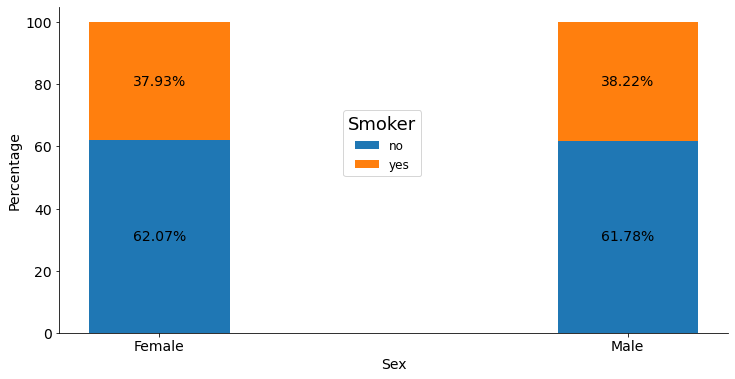

In [42]:
# Add labels
for c in ax.containers:
    labels = [str(round(v.get_height(), 2)) + "%" if v.get_height() > 0 else '' for v in c]
    ax.bar_label(c,
                 label_type='center',
                 labels = labels,
                 size = 14) # add a container object "c" as first argument

# Remove spines
for s in ["top", "right"]:
    ax.spines[s].set_visible(False)

# Add labels
ax.tick_params(labelsize = 14, labelrotation = 0)
ax.set_ylabel("Percentage", size = 14)
ax.set_xlabel("Sex", size = 14)

# Add legend
ax.legend(labels = ["no", "yes"],
          fontsize = 12,
          title = "Smoker",
          title_fontsize = 18,
          bbox_to_anchor = [0.55, 0.7])

# Fix legend position
# ax.legend_.set_bbox_to_anchor([0.55, 0.7])

fig

In [43]:
# Save figure
fig.savefig("images/stackedbarplot.png", dpi = 300)

### Stacked barplot `with pandas DataFrame` [pandas plot method]

In [44]:
df

smoker,No,Yes
sex,,
Female,62.07,37.93
Male,61.78,38.22


<AxesSubplot:xlabel='sex'>

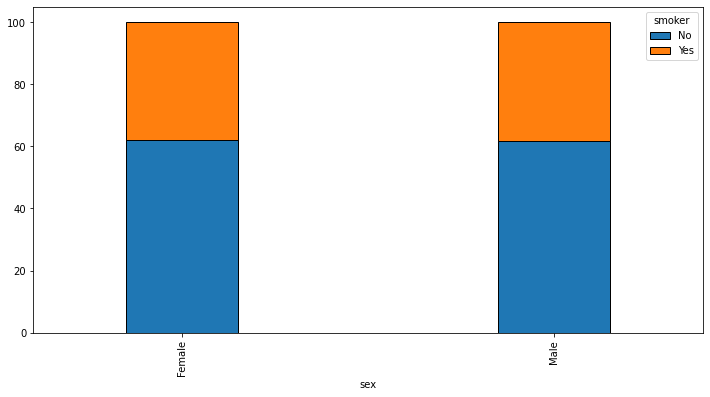

In [45]:
fig, ax = plt.subplots(figsize = (12, 6))

# Plot
df.plot(kind = "bar",
        stacked = True,
        ax = ax,
        width = 0.3,
        edgecolor = "black")

<AxesSubplot:xlabel='sex'>

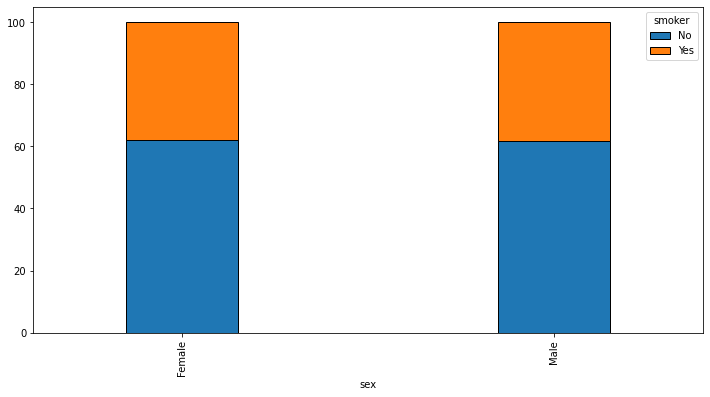

In [46]:
# OR

fig, ax = plt.subplots(figsize = (12, 6))

# Plot
df.plot.bar(stacked = True,
            ax = ax,
            width = 0.3,
            edgecolor = "black")

### Customising barplot

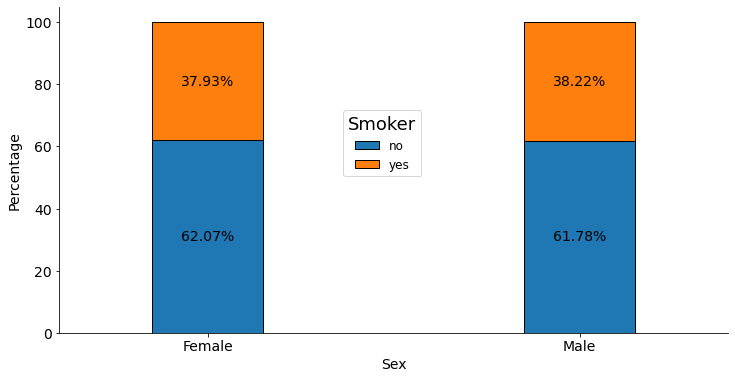

In [48]:
# Add labels
for c in ax.containers:
    labels = [str(round(v.get_height(), 2)) + "%" if v.get_height() > 0 else '' for v in c]
    ax.bar_label(c,
                 label_type='center',
                 labels = labels,
                 size = 14) # add a container object "c" as first argument

# Remove spines
for s in ["top", "right"]:
    ax.spines[s].set_visible(False)

# Add labels
ax.tick_params(labelsize = 14, labelrotation = 0)
ax.set_ylabel("Percentage", size = 14)
ax.set_xlabel("Sex", size = 14)

# Add legend
ax.legend(labels = ["no", "yes"],
          fontsize = 12,
          title = "Smoker",
          title_fontsize = 18)

# Fix legend position
ax.legend_.set_bbox_to_anchor([0.55, 0.7])

fig